#P0. cargar librerias

In [ ]:
import numpy as np              #Mejora el soporte para vectores y matrices
import pandas as pd             #Estructura de datos (Ciencia de datos)
import matplotlib.pyplot as plt #Para graficar
import seaborn as sns           #interfaz de alto nivel para dibujar gráficos estadísticos (basada en matplotlib)
%matplotlib inline

##P0.1 librerías de machine Learning

In [ ]:
from sklearn.model_selection import train_test_split    #para separar la Data en entrenamiento / testeo
from sklearn.linear_model import LinearRegression       #instancia el algoritmo de regresión Lineal

#P1.cargar data

---
La data es un CSV en Github


In [ ]:
petrol_df = pd.read_csv('https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/petrol_consumption.csv')
petrol_df.head(10)   #imprimimos las primeras 10 filas

#P2. conocer la data

In [ ]:
#Cuantos registros tiene el dataset (rowsXcolumns)
print('Dimensiones de la data:',petrol_df.shape,'\n------')
#Hay datos nulos (null) en el dataset?
print('Listado de columnas con Nulos:', petrol_df.isnull().sum(),'\n------')
print('Descripción estadistica de cada columna:', petrol_df.describe())

Dimensiones de la data: (48, 5) 
------
Listado de columnas con Nulos: gasolina_impuesto                       0
ingreso_promedio                        0
carreteras_pavimentadas                 0
porcen_licencias_conducion_poblacion    0
gasolina_Consumo                        0
dtype: int64 
------
Descripción estadistica de cada columna:        gasolina_impuesto  ingreso_promedio  carreteras_pavimentadas  \
count          48.000000         48.000000                48.000000   
mean            7.668333       4241.833333              5565.416667   
std             0.950770        573.623768              3491.507166   
min             5.000000       3063.000000               431.000000   
25%             7.000000       3739.000000              3110.250000   
50%             7.500000       4298.000000              4735.500000   
75%             8.125000       4578.750000              7156.000000   
max            10.000000       5342.000000             17782.000000   

       porcen_lic

##matriz de correlación 
para medir las relaciones lineales entre las variables y de esa forma determinar que valores son más practicos para entregar un modelo de regresión lineal.

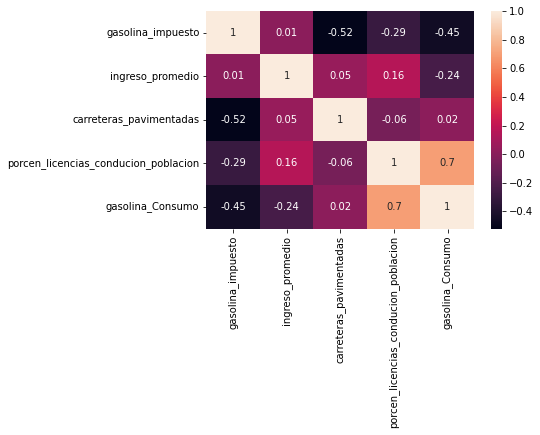

In [ ]:
#función de correlación de pandas (cercano a 1 es la mejor correlación, negativos la peor)
correlation_matrix = petrol_df.corr().round(2)
# annot = True (para imprimir los valores dentro del cuadrado)
sns.heatmap(data=correlation_matrix, annot=True)

##Grafica de sabana comparativa

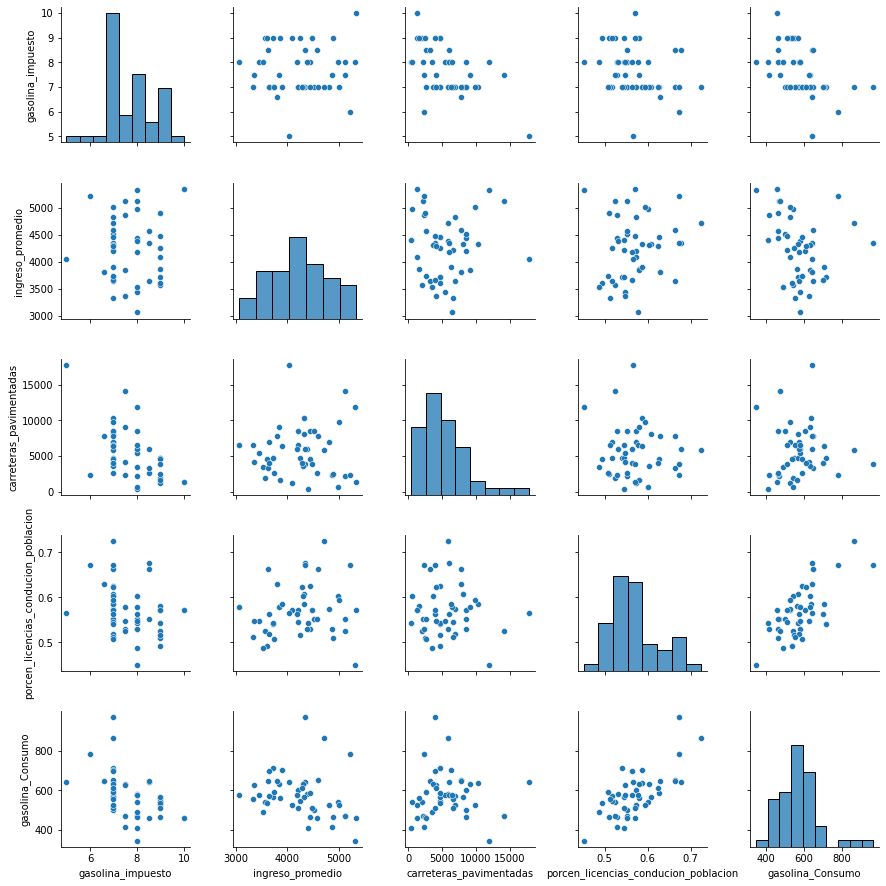

In [ ]:
sns.pairplot(petrol_df);

##consumo vs licencias

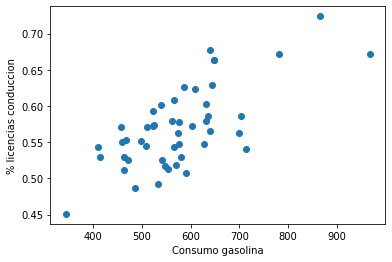

In [ ]:
X = petrol_df['gasolina_Consumo']
y = petrol_df['porcen_licencias_conducion_poblacion']
plt.scatter(X, y)
plt.xlabel('Consumo gasolina')
plt.ylabel('% licencias conduccion')
plt.show()

#P3. separando datos

---
convertimos los datos que estan en un dataFrame a un array usando Numpy (np.c_)


In [ ]:
#X = petrol_df.drop('gasolina_Consumo', axis=1)
#X = pd.DataFrame(np.c_[petrol_df['porcen_licencias_conducion_poblacion']], columns = ['porcen_licencias_conducion_poblacion'])
X = pd.DataFrame(np.c_[petrol_df['porcen_licencias_conducion_poblacion'], petrol_df['gasolina_impuesto'],petrol_df['ingreso_promedio']], 
                 columns = ['porcen_licencias_conducion_poblacion','gasolina_impuesto','ingreso_promedio'])

Y = np.array(petrol_df['gasolina_Consumo']).reshape(-1, 1)
#print(X)

Separamos los datos en un porcentaje algo:

*   % alto para Train -> pocos datos
*   % pequeño para Train-> muchos datos



In [53]:
PorcenTrain= 0.4
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = PorcenTrain, random_state=48)

print("xTrain",(1-PorcenTrain)*100,"%: "+str(X_train.shape) +", xTest",(PorcenTrain*100),"%: "+str(X_test.shape))
print("yTrain",(1-PorcenTrain)*100,"%: "+str(Y_train.shape) +", yTest",(PorcenTrain*100),"%: "+str(Y_test.shape))

xTrain 60.0 %: (28, 3), xTest 40.0 %: (20, 3)
yTrain 60.0 %: (28, 1), yTest 40.0 %: (20, 1)


#P4. entrenando modelo de Y=MX+B (regresion lineal)

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
print(lin_model.score(X_train, Y_train))

0.7632929043103189
